In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [109]:
url1 = 'https://raw.githubusercontent.com/yasmin-mohamed-sufi/Avi/main/df_t1new.csv'
df_1 = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/yasmin-mohamed-sufi/Avi/main/df_t2new.csv'
df_2 = pd.read_csv(url2)


In [110]:
#merge the 2 datasets we imported from github
df_list = [df_1, df_2]
df = pd.concat(df_list, axis=0, join="outer", ignore_index=True)
df

,Unnamed: 0,dangerLevel,elevation_th,HN72_24,HN24_7d,Pen_depth,HN24,min_ccl_pen,RH,wind_trans24_3d,wind_trans24,wind_trans24_7d,warnreg
0,6,2.0,2000.0,54.171375,107.07,42.120689,31.513500,0.18,94.3750,6.60,4.150375,29.01,15.0
1,9,2.0,2300.0,69.655625,104.03,29.936934,36.570125,0.21,88.7500,5.05,1.358000,15.72,15.0
2,16,3.0,2000.0,102.098125,150.70,37.159607,54.272000,0.24,93.3750,112.12,105.515000,132.03,15.0
3,18,2.0,2300.0,80.960375,136.84,39.275160,43.528125,0.20,81.8750,0.00,0.000000,4.90,15.0
4,26,2.0,2300.0,61.764875,101.70,26.552468,0.574625,0.28,60.6250,15.61,11.662125,23.97,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64508,211749,2.0,2600.0,3.161125,21.94,7.603113,0.451625,2.16,49.4375,4.27,1.782500,16.54,21.0
64509,211754,2.0,2600.0,16.543375,58.03,14.847116,0.948000,0.35,65.1375,17.32,1.242250,33.48,21.0
64510,211755,2.0,2400.0,40.174625,61.44,17.816030,5.519375,0.27,75.9875,18.12,5.835375,24.40,21.0
64511,211758,2.0,2400.0,27.050875,40.95,11.679789,1.507250,0.30,65.5375,20.83,5.153125,39.55,21.0


In [111]:
#delete column unnamed
df3 = df.drop("Unnamed: 0", axis="columns")
df3

,dangerLevel,elevation_th,HN72_24,HN24_7d,Pen_depth,HN24,min_ccl_pen,RH,wind_trans24_3d,wind_trans24,wind_trans24_7d,warnreg
0,2.0,2000.0,54.171375,107.07,42.120689,31.513500,0.18,94.3750,6.60,4.150375,29.01,15.0
1,2.0,2300.0,69.655625,104.03,29.936934,36.570125,0.21,88.7500,5.05,1.358000,15.72,15.0
2,3.0,2000.0,102.098125,150.70,37.159607,54.272000,0.24,93.3750,112.12,105.515000,132.03,15.0
3,2.0,2300.0,80.960375,136.84,39.275160,43.528125,0.20,81.8750,0.00,0.000000,4.90,15.0
4,2.0,2300.0,61.764875,101.70,26.552468,0.574625,0.28,60.6250,15.61,11.662125,23.97,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64508,2.0,2600.0,3.161125,21.94,7.603113,0.451625,2.16,49.4375,4.27,1.782500,16.54,21.0
64509,2.0,2600.0,16.543375,58.03,14.847116,0.948000,0.35,65.1375,17.32,1.242250,33.48,21.0
64510,2.0,2400.0,40.174625,61.44,17.816030,5.519375,0.27,75.9875,18.12,5.835375,24.40,21.0
64511,2.0,2400.0,27.050875,40.95,11.679789,1.507250,0.30,65.5375,20.83,5.153125,39.55,21.0


In [112]:
#define independent features i.e. x 
#define dependent features i.e. y

y = df3["dangerLevel"]
X = df3.drop("dangerLevel", axis=1)

In [113]:
#split dataframe into random samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [114]:
#create decision tree classifier and try with max depth 2 (later we will optimize)
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)


In [115]:
#fit model to training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [116]:
y_preds_class = tree.predict(X_test)
y_preds_class

array([1., 2., 3., ..., 2., 2., 2.])

In [117]:
print(classification_report(y_test, y_preds_class))

              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89      1879
         2.0       0.67      0.85      0.75      9488
         3.0       0.71      0.54      0.61      7690
         4.0       0.46      0.07      0.13       290
         5.0       0.00      0.00      0.00         7

    accuracy                           0.71     19354
   macro avg       0.57      0.45      0.48     19354
weighted avg       0.72      0.71      0.70     19354



/Users/florencebloch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/florencebloch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/florencebloch/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [118]:
#not good bc accuracy of 1 basically impossible and no values for group 5 -> group danger levels 4&5 to reduce imbalance

In [119]:
#group the danger levels 4 & 5 to 1 group to reduce class imbalance
def danger (row):
   if row['dangerLevel'] == 1 :
      return '1'
   if row['dangerLevel'] == 2 :
      return '2'
   if row['dangerLevel'] == 3 :
      return '3'
   if row['dangerLevel'] == 4:
      return '4'
   if row['dangerLevel'] == 5:
      return '4'

In [120]:
df3 = df3.astype(float)

In [121]:
df3.apply (lambda row: danger(row), axis=1)

0        2
1        2
2        3
3        2
4        2
        ..
64508    2
64509    2
64510    2
64511    2
64512    2
Length: 64513, dtype: object

In [122]:
df3['dangerclasses'] = df3.apply (lambda row: danger(row), axis=1)

In [123]:
df3

,dangerLevel,elevation_th,HN72_24,HN24_7d,Pen_depth,HN24,min_ccl_pen,RH,wind_trans24_3d,wind_trans24,wind_trans24_7d,warnreg,dangerclasses
0,2.0,2000.0,54.171375,107.07,42.120689,31.513500,0.18,94.3750,6.60,4.150375,29.01,15.0,2
1,2.0,2300.0,69.655625,104.03,29.936934,36.570125,0.21,88.7500,5.05,1.358000,15.72,15.0,2
2,3.0,2000.0,102.098125,150.70,37.159607,54.272000,0.24,93.3750,112.12,105.515000,132.03,15.0,3
3,2.0,2300.0,80.960375,136.84,39.275160,43.528125,0.20,81.8750,0.00,0.000000,4.90,15.0,2
4,2.0,2300.0,61.764875,101.70,26.552468,0.574625,0.28,60.6250,15.61,11.662125,23.97,15.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64508,2.0,2600.0,3.161125,21.94,7.603113,0.451625,2.16,49.4375,4.27,1.782500,16.54,21.0,2
64509,2.0,2600.0,16.543375,58.03,14.847116,0.948000,0.35,65.1375,17.32,1.242250,33.48,21.0,2
64510,2.0,2400.0,40.174625,61.44,17.816030,5.519375,0.27,75.9875,18.12,5.835375,24.40,21.0,2
64511,2.0,2400.0,27.050875,40.95,11.679789,1.507250,0.30,65.5375,20.83,5.153125,39.55,21.0,2


In [124]:
df3 = df3.astype(float)

In [125]:
df3

,dangerLevel,elevation_th,HN72_24,HN24_7d,Pen_depth,HN24,min_ccl_pen,RH,wind_trans24_3d,wind_trans24,wind_trans24_7d,warnreg,dangerclasses
0,2.0,2000.0,54.171375,107.07,42.120689,31.513500,0.18,94.3750,6.60,4.150375,29.01,15.0,2.0
1,2.0,2300.0,69.655625,104.03,29.936934,36.570125,0.21,88.7500,5.05,1.358000,15.72,15.0,2.0
2,3.0,2000.0,102.098125,150.70,37.159607,54.272000,0.24,93.3750,112.12,105.515000,132.03,15.0,3.0
3,2.0,2300.0,80.960375,136.84,39.275160,43.528125,0.20,81.8750,0.00,0.000000,4.90,15.0,2.0
4,2.0,2300.0,61.764875,101.70,26.552468,0.574625,0.28,60.6250,15.61,11.662125,23.97,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64508,2.0,2600.0,3.161125,21.94,7.603113,0.451625,2.16,49.4375,4.27,1.782500,16.54,21.0,2.0
64509,2.0,2600.0,16.543375,58.03,14.847116,0.948000,0.35,65.1375,17.32,1.242250,33.48,21.0,2.0
64510,2.0,2400.0,40.174625,61.44,17.816030,5.519375,0.27,75.9875,18.12,5.835375,24.40,21.0,2.0
64511,2.0,2400.0,27.050875,40.95,11.679789,1.507250,0.30,65.5375,20.83,5.153125,39.55,21.0,2.0


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [127]:
#drop dangerLevel as we replace it with dangerclasses
df4 = df3.drop("dangerLevel", axis=1)

In [128]:
#define independent features i.e. x 
#define dependent features i.e. y

y1 = df4['dangerclasses']
X1 = df4.drop('dangerclasses', axis=1)

In [129]:
#perform a decision tree
#split dataframe into random samples for training and testing, testing data = 30%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=1)

In [130]:
#create decision tree classifier and try with max depth 2 (later we will optimize)
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [131]:
#fit model to training data
tree.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [132]:
y1_preds_class = tree.predict(X1_test)
y1_preds_class

array([1., 2., 3., ..., 2., 2., 2.])

In [133]:
#print classification report to see how well our model performed
print(classification_report(y1_test, y1_preds_class))

              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89      1879
         2.0       0.67      0.85      0.75      9488
         3.0       0.71      0.54      0.61      7690
         4.0       0.52      0.08      0.14       297

    accuracy                           0.71     19354
   macro avg       0.72      0.57      0.60     19354
weighted avg       0.72      0.71      0.70     19354



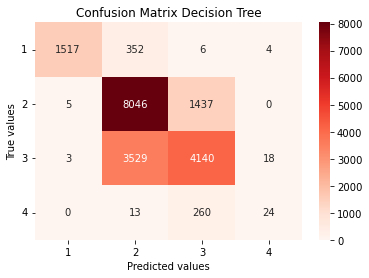

In [134]:
#create confusion matrix for our decision tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax= plt.subplot()
cm = confusion_matrix(y1_test, y1_preds_class) 
sns.heatmap(cm, cmap="Reds", annot=True, fmt= "d", ax = ax); #fmt=d so we see whole numbers not e^something

#define ticks, labels and title for heatmap
class_labels = ["1","2","3","4"]
tick_marks = np.arange(len(class_labels))+0.5 #+0.5 for position of the labels
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0) #rotation = 0 -> labels are horizontal not rotated
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_xlabel('Predicted values');
ax.set_ylabel('True values');
ax.set_title('Confusion Matrix Decision Tree');

In [135]:
#do another decision tree but optimize it using cross validation 
#figure out ideal max depth and samples leaf 
X2 = df4.drop('dangerclasses',axis=1)
y2 = df4['dangerclasses']

In [136]:
#split dataframe into random samples for training and testing, testing data = 30%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [137]:
#define parameters as dictionaries
parameters = {"max_depth":range(1,30),
              "min_samples_leaf":[1, 10, 20, 30, 50,10]}
parameters


{'max_depth': range(1, 30), 'min_samples_leaf': [1, 10, 20, 30, 50, 10]}

In [138]:
tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state = 1), parameters, cv= 5)
#cv = 5 -> 5 fold cross validation
#parameters: above dictionary
#entropy: measure quality of splite: shannon information gain


In [139]:
#fit model to training data
tree_CV.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_leaf': [1, 10, 20, 30, 50, 10]})

In [140]:
#get best parameters for decision tree with cross validation from the range we defined previously
tree_CV.best_params_

{'max_depth': 11, 'min_samples_leaf': 50}

In [141]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",tree_CV.best_estimator_)
print("\n The best score across ALL searched params:\n",tree_CV.best_score_)
print("\n The best parameters across ALL searched params:\n",tree_CV.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=50,
                       random_state=1)

 The best score across ALL searched params:
 0.7482450395493369

 The best parameters across ALL searched params:
 {'max_depth': 11, 'min_samples_leaf': 50}


In [142]:
#print classification report to see how well our model performed
y_pred_class2 = tree_CV.predict(X2_test)
print(classification_report(y2_test, y_pred_class2))

              precision    recall  f1-score   support

         1.0       0.97      0.84      0.90      1879
         2.0       0.73      0.81      0.77      9488
         3.0       0.71      0.66      0.69      7690
         4.0       0.59      0.16      0.25       297

    accuracy                           0.74     19354
   macro avg       0.75      0.62      0.65     19354
weighted avg       0.74      0.74      0.74     19354



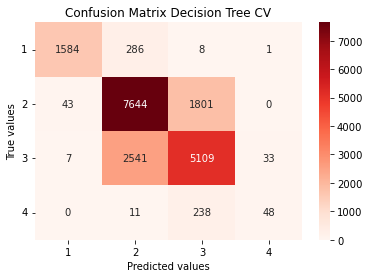

In [143]:
#create confusion matrix for our decision tree with cross validation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix and heatmap
ax= plt.subplot()
cm = confusion_matrix(y2_test, y_pred_class2) 
sns.heatmap(cm, cmap="Reds", annot=True,fmt= "d", ax = ax); #fmt=d so we see whole numbers not e^something

#define ticks, labels and title for heatmap
class_labels = ["1","2","3","4"]
tick_marks = np.arange(len(class_labels))+0.5 #+0.5 for position of the labels
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0) #rotation = 0 -> labels are horizontal not rotated
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_xlabel('Predicted values');
ax.set_ylabel('True values');
ax.set_title('Confusion Matrix Decision Tree CV');

In [144]:
#do a random forest
X3 = df4.drop('dangerclasses',axis=1)
y3 = df4['dangerclasses']

In [145]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [146]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    
}

In [147]:
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X6_train, y6_train.values.ravel())

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

In [ ]:
parameters2 = {
    "n_estimators":[250, 500, 750, 1000],
    
}

In [ ]:
rfc2 = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc2,parameters2,cv=5)
cv.fit(X6_train, y6_train.values.ravel())

In [ ]:
display(cv)

In [ ]:
#use n_estimators = 750
forest = RandomForestClassifier(n_estimators = 750)

In [ ]:
forest.fit(X3_train,y3_train)

In [ ]:
#plot the importance of the variables from most to least important
def plot_variable_importance(model, X3_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X3_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300)
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

In [ ]:
plot_variable_importance(forest, X3_train)

In [ ]:
y_pred_class3 = forest.predict(X3_test)
print(classification_report(y3_test, y_pred_class3))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix and heatmap
ax= plt.subplot()
cm = confusion_matrix(y3_test, y_pred_class3) 
sns.heatmap(cm, cmap="Reds", annot=True,fmt= "d", ax = ax); #fmt=d so we see whole numbers not e^something

#define ticks, labels and title for heatmap
class_labels = ["1","2","3","4"]
tick_marks = np.arange(len(class_labels))+0.5 #+0.5 for position of the labels
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0) #rotation = 0 -> labels are horizontal not rotated
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_xlabel('Predicted values');
ax.set_ylabel('True values');
ax.set_title('Confusion Matrix Random Forest');

In [ ]:
y4 = df4['dangerclasses']
X4 = df4.drop('dangerclasses', axis=1)

In [ ]:
#figure out how many values we have of each danger class
y4.value_counts()

In [ ]:
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
#define independent features i.e. x 
#define dependent features i.e. y

y5 = df4['dangerclasses']
X5 = df4.drop('dangerclasses', axis=1)

In [ ]:
#split dataframe into random samples for training and testing
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.3, random_state=1)

In [ ]:
#Do random oversampling on the minority classes 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X5_train_ros, y5_train_ros= ros.fit_resample(X5_train, y5_train)
# Check the number of records after over sampling
print(sorted(Counter(y5_train_ros).items()))

In [ ]:
#create decision tree classifier and try with max depth 2 (later we will optimize)
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [ ]:
#fit model to training data
tree.fit(X5_train_ros, y5_train_ros)

In [ ]:
y5_preds_class_ros = tree.predict(X5_test)
y5_preds_class_ros

In [ ]:
print(classification_report(y5_test, y5_preds_class_ros))

In [ ]:
#accuracy is worse with random oversampling and no accuracy for danger class 3 -> try SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X5_train_smote, y5_train_smote= smote.fit_resample(X5_train, y5_train)
# Check the number of records after over sampling
print(sorted(Counter(y5_train_smote).items()))

In [ ]:
#create decision tree classifier and try with max depth 2 (later we will optimize)
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [ ]:
#fit model to training data
tree.fit(X5_train_smote, y5_train_smote)

In [ ]:
y5_preds_class_smote = tree.predict(X5_test)
y5_preds_class_smote

In [ ]:
print(classification_report(y5_test, y5_preds_class_smote))

In [ ]:
#overall accuracy worse but recall better for 4 ->  improved the model’s ability to capture the minority class
#recall for class 3 decreased -> try to also improve that
#but precision worse

In [ ]:
#do smote oversampling on decision tree with cross validation
X6 = df4.drop('dangerclasses',axis=1)
y6 = df4['dangerclasses']

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=1)

In [ ]:
smote = SMOTE(random_state=42)
X6_train_smote, y6_train_smote= smote.fit_resample(X6_train, y6_train)
# Check the number of records after over sampling
print(sorted(Counter(y6_train_smote).items()))

In [ ]:
parameters = {"max_depth":range(1,30),
              "min_samples_leaf":[1, 10, 20, 30, 50,10]}
parameters 

In [ ]:
tree_CV = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state = 1), parameters, cv=5)

In [ ]:
tree_CV.fit(X6_train_smote, y6_train_smote)

In [ ]:
tree_CV.best_params_

In [ ]:
y_pred_class6 = tree_CV.predict(X6_test)
print(classification_report(y6_test, y_pred_class6))

In [ ]:
#improved recall and accuracy but still not accuracy we want

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix and heatmap
ax= plt.subplot()
cm = confusion_matrix(y6_test, y_pred_class6) 
sns.heatmap(cm, cmap="Reds", annot=True,fmt= "d", ax = ax); #fmt=d so we see whole numbers not e^something

#define ticks, labels and title for heatmap
class_labels = ["1","2","3","4"]
tick_marks = np.arange(len(class_labels))+0.5 #+0.5 for position of the labels
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0) #rotation = 0 -> labels are horizontal not rotated
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_xlabel('Predicted values');
ax.set_ylabel('True values');
ax.set_title('Confusion Matrix Decision Tree CV Oversampling');

In [ ]:
#do smote on random forest to try to improve accuracy
X7 = df4.drop('dangerclasses',axis=1)
y7 = df4['dangerclasses']

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=1)

In [ ]:
smote = SMOTE(random_state=42)
X7_train_smote, y7_train_smote= smote.fit_resample(X7_train, y7_train)
# Check the number of records after over sampling
print(sorted(Counter(y7_train_smote).items()))

In [ ]:
forest = RandomForestClassifier(n_estimators = 750)

In [ ]:
forest.fit(X7_train_smote,y7_train_smote)

In [ ]:
y_pred_class7 = forest.predict(X7_test)
print(classification_report(y7_test, y_pred_class7))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#create confusion matrix and heatmap
ax= plt.subplot()
cm = confusion_matrix(y3_test, y_pred_class3) 
sns.heatmap(cm, cmap="Reds", annot=True,fmt= "d", ax = ax); #fmt=d so we see whole numbers not e^something

#define ticks, labels and title for heatmap
class_labels = ["1","2","3","4"]
tick_marks = np.arange(len(class_labels))+0.5 #+0.5 for position of the labels
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels,rotation=0) #rotation = 0 -> labels are horizontal not rotated
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels,rotation=0)

ax.set_xlabel('Predicted values');
ax.set_ylabel('True values');
ax.set_title('Confusion Matrix Random Forest Oversampling');